# Mini Projeto 11: Algoritmo de Metropolis-Hastings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# Simetria da distribuição uniforme

Uma distribuição de probabilidade condicional é simétrica se

$$
q(x|y) = q(y|x)
$$

Sendo 

$$
q(y|x) = 1; y \in [x-b, x+b],
$$

então

$$
x - b \geq y \leq x + b \implies -b \geq y - x \leq b
$$

logo $|y - x| \leq b$

Se a probabilidade de aceite ocorre caso $|y - x| \leq b$ ocorra e como aplicar $y$ ou $x$ na função módulo resulta em mesma diferença, independente da ordem, a distribuição $q(y|x) = 1; y \in [x-b, x+b],$ é simétrica 

Com a simetria, o algoritmo de metropolis pode ser aplicado utilizadno a probabilidade de aceite dada por

$$
r = min\Bigg\{\frac{f(y)}{f(x)} \frac{q(x|y)}{q(y|x)}, 1\Bigg\} = min\Bigg\{\frac{f(y)}{f(x)}, 1\Bigg\}
$$

# Algoritmo de MH

In [142]:
def get_metropolis_hastings_sample(N, x_0, station_func, b):
    mhs = [x_0]
    acc = 0
    for i in range(N):

        y = rnd.uniform(mhs[i]-b, mhs[i]+b)
        
        r = min(station_func(y) / station_func(mhs[i]), 1)
            
        if rnd.random() <= r:
            mhs.append(y)
            acc+=1
        else:
            mhs.append(mhs[i])
    print("Selected points percentage: ", acc/N)
    
    return mhs, acc/N

## Amostragem para distribuição Normal

In [150]:
def plot_outputs_normal(N, sigma, b):
    station_f = lambda x: (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (x/sigma)**2)
    
    x_0 = station_f(rnd.random())
    mhs, acc = get_metropolis_hastings_sample(N=N, x_0=x_0, station_func=station_f, b=b)
    
    plt.figure(figsize=(16,6))
    plt.plot([i for i in range(len(mhs))], mhs)
    plt.suptitle('Metropolis-Hastings', fontsize=25)
    plt.ylabel(r'$MH_{output}$', fontsize=13)
    plt.xlabel('Time')
    plt.show()
    
    plt.figure(figsize=(16,6))
    plt.hist(mhs, density=True, bins=100, label='Frequency')
    plt.show()
    
    h = np.histogram(mhs, bins=100, density=True)
    X = h[1][1:]
    Y = h[0]
    Y = np.divide(Y, max(Y))
    plt.figure(figsize=(16,6))
    plt.plot(X, Y, 'o-', label=r'$MH_{output}$')
    X.sort()
    Y = station_f(X)
    Y = np.divide(Y, max(Y))
    plt.plot(X, Y, label=r'Stationary distribution')
    plt.legend()
    plt.show()

## Amostragem para dstribuição de Cauchy

In [160]:
def plot_outputs_cauchy(N, b):
    station_f = lambda x: (1/np.pi) * (1/ (1 + x**2))
    
    x_0 = station_f(rnd.random())
    mhs, acc = get_metropolis_hastings_sample(N=N, x_0=x_0, station_func=station_f, b=b)
    
    plt.figure(figsize=(16,6))
    plt.plot([i for i in range(len(mhs))], mhs)
    plt.suptitle('Metropolis-Hastings', fontsize=25)
    plt.ylabel(r'$MH_{output}$', fontsize=13)
    plt.xlabel('Time')
    plt.show()
    
    plt.figure(figsize=(16,6))
    plt.hist(mhs, density=True, bins=100, label='Frequency')
    plt.show()
    
    h = np.histogram(mhs, bins=100, density=True)
    X = h[1][1:]
    Y = h[0]
    Y = np.divide(Y, max(Y))
    plt.figure(figsize=(16,6))
    plt.plot(X, Y, 'o-', label=r'$MH_{output}$')
    X.sort()
    Y = station_f(X)
    Y = np.divide(Y, max(Y))
    plt.plot(X, Y, label=r'Stationary distribution')
    plt.legend()
    plt.show()

# Resultados: Normal

### Função estacionária $N(\mu = 0, \sigma = 1)$, $b = 0.01$

Selected points percentage:  0.99845


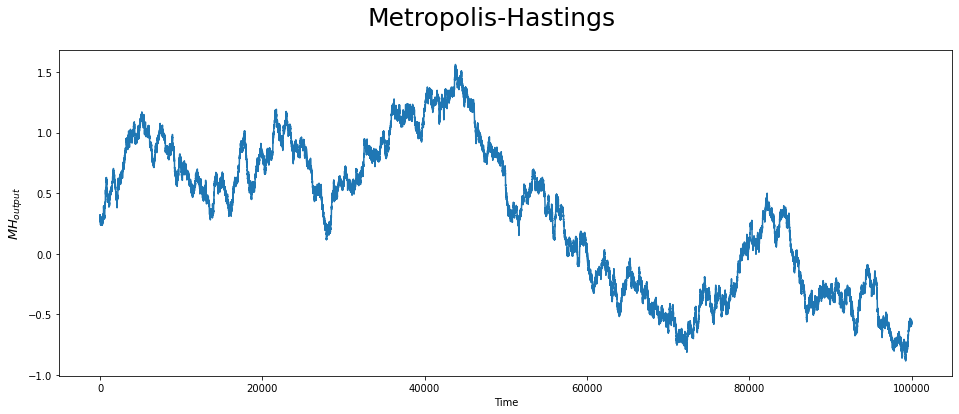

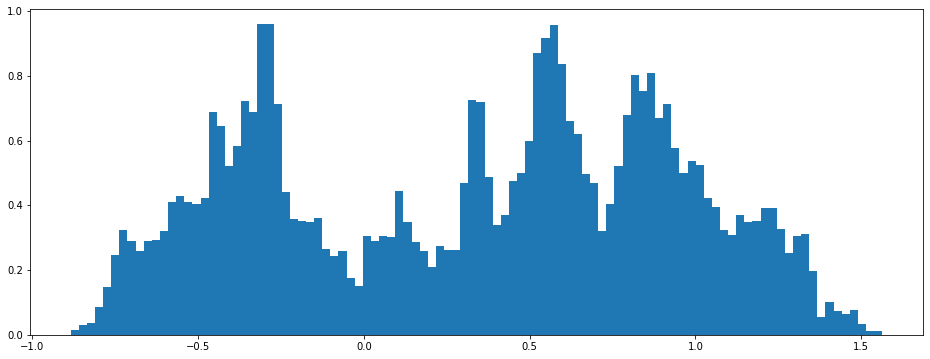

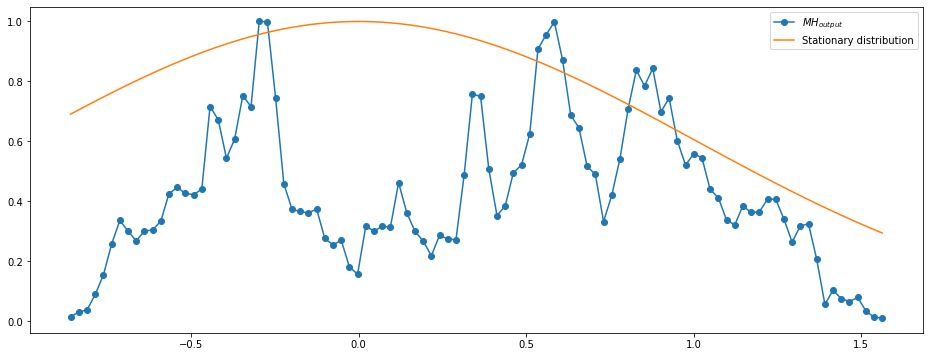

In [153]:
N = 100000
sigma = 1
b = 0.01
plot_outputs_normal(N=N, sigma=sigma, b=b)

### Função estacionária $N(\mu = 0, \sigma = 1)$, $b = 0.1$

Selected points percentage:  0.98086


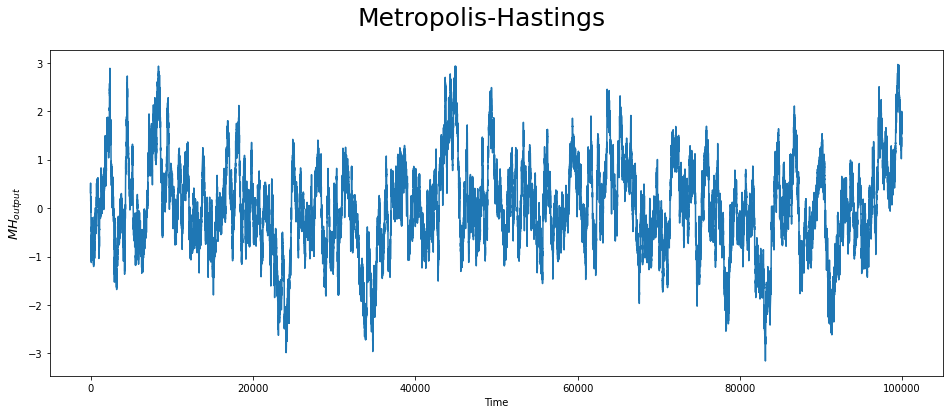

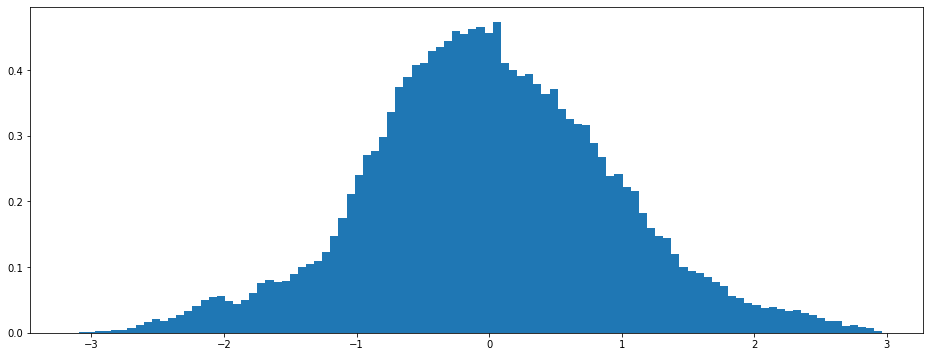

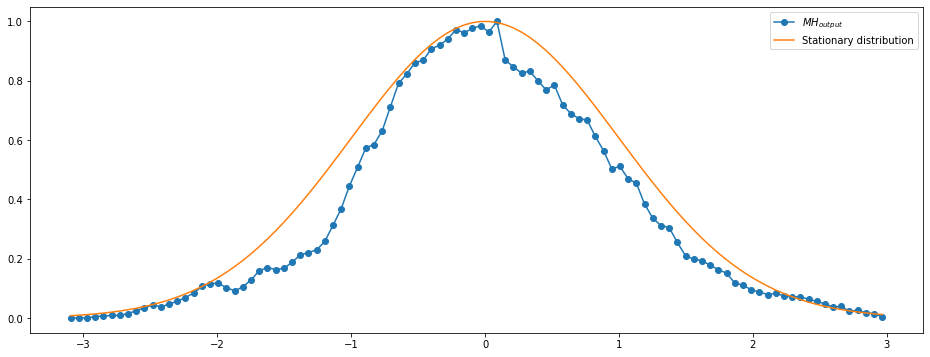

In [154]:
N = 100000
sigma = 1
b = 0.1
plot_outputs_normal(N=N, sigma=sigma, b=b)

### Função estacionária $N(\mu = 0, \sigma = 1)$, $b = 1$

Selected points percentage:  0.80264


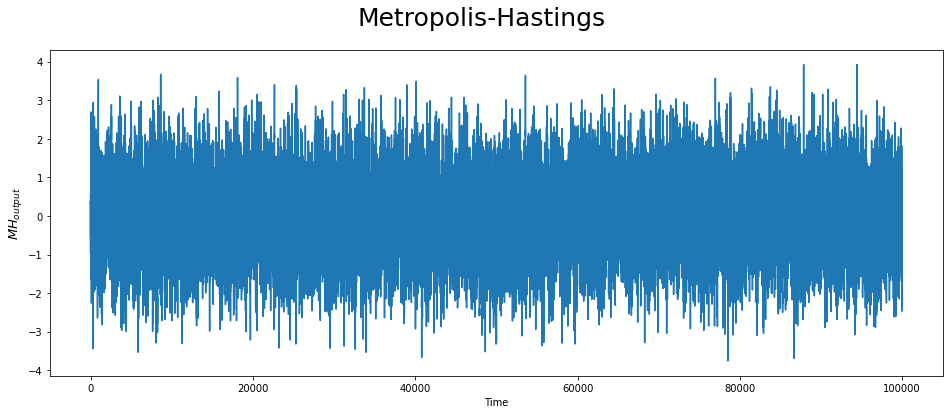

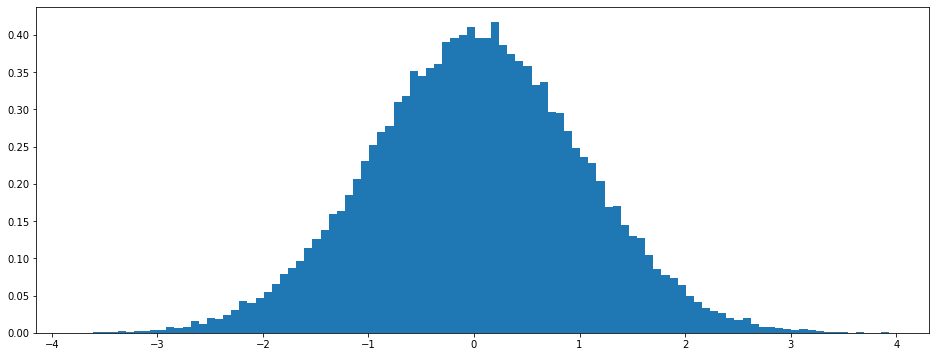

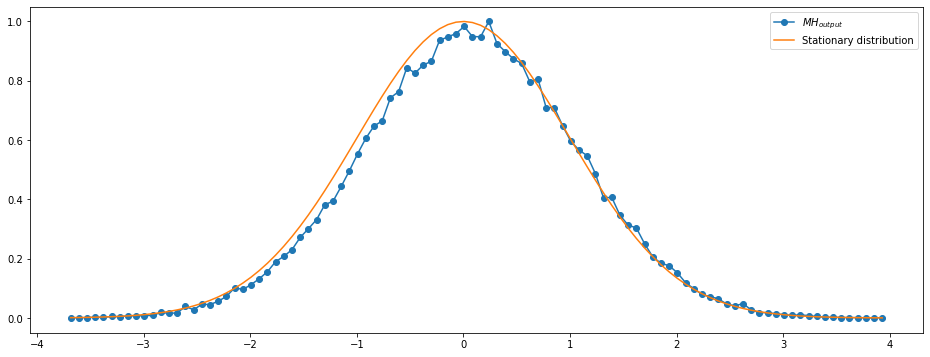

In [155]:
N = 100000
sigma = 1
b = 1
plot_outputs_normal(N=N, sigma=sigma, b=b)

### Função estacionária $N(\mu = 0, \sigma = 1)$, $b = 100$

Selected points percentage:  0.01555


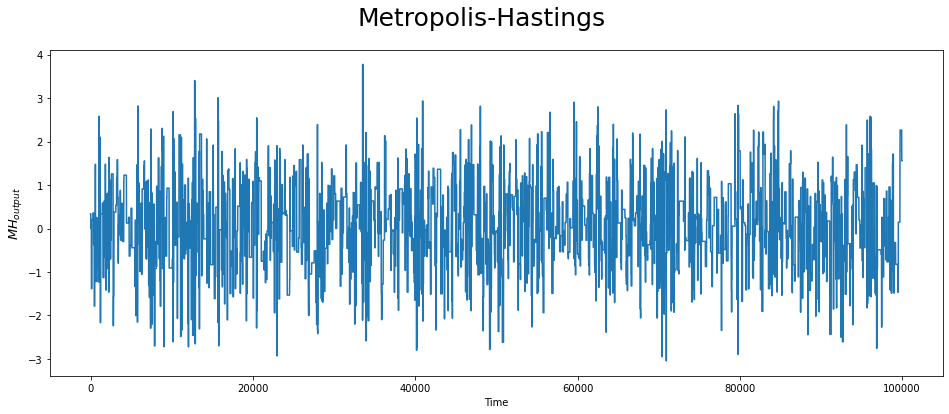

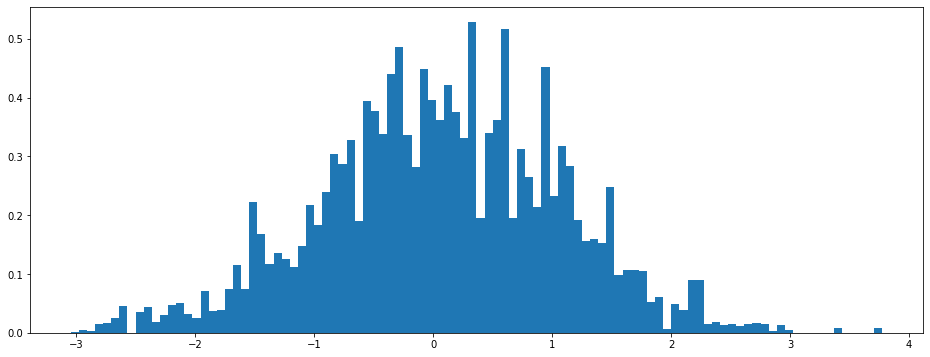

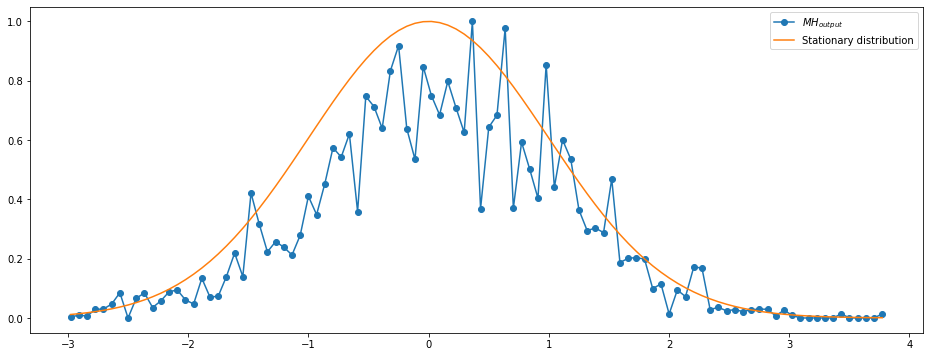

In [156]:
N = 100000
sigma = 1
b = 100
plot_outputs_normal(N=N, sigma=sigma, b=b)

# Resultados: Cauchy

### Função estacionária: Cauchy, $b = 0.01$

Selected points percentage:  0.99878


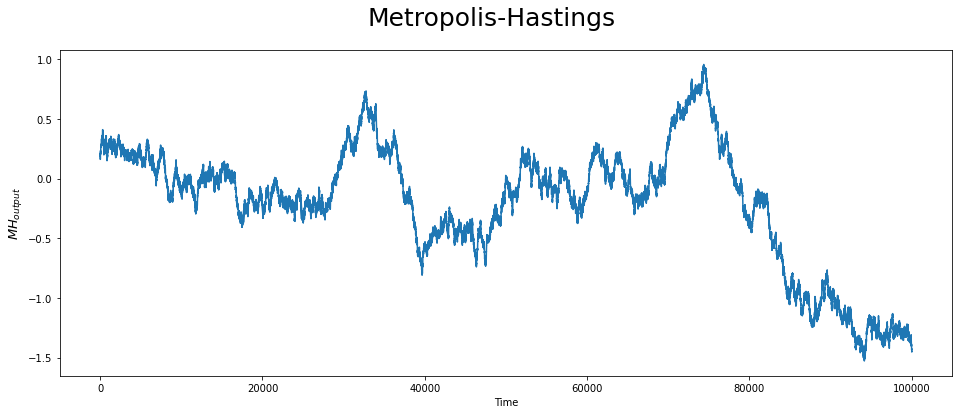

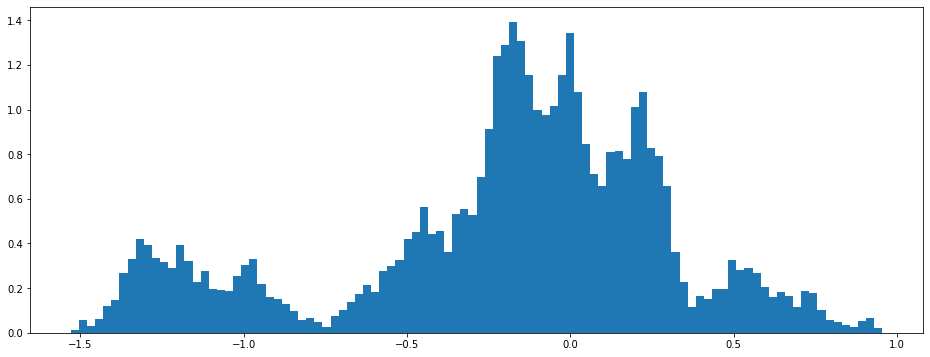

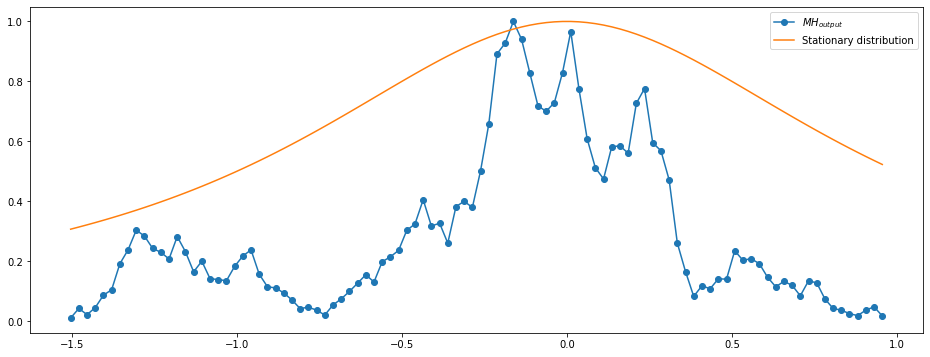

In [161]:
N = 100000
b = 0.01
plot_outputs_cauchy(N=N, b=b)

### Função estacionária: Cauchy, $b = 0.1$

Selected points percentage:  0.98228


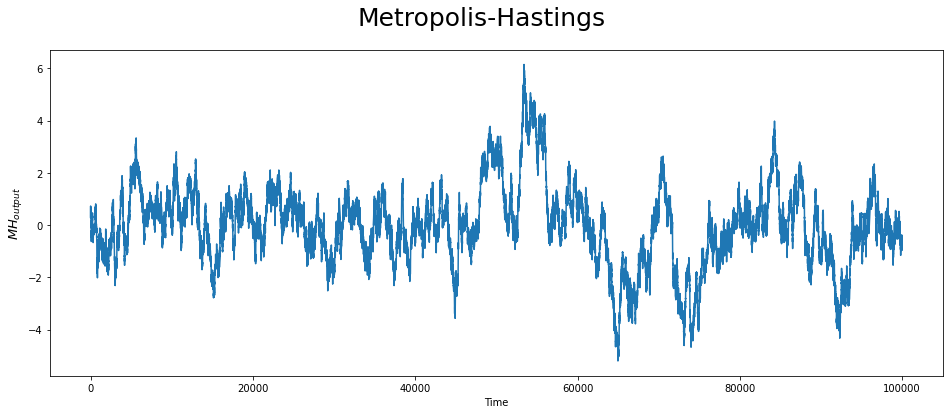

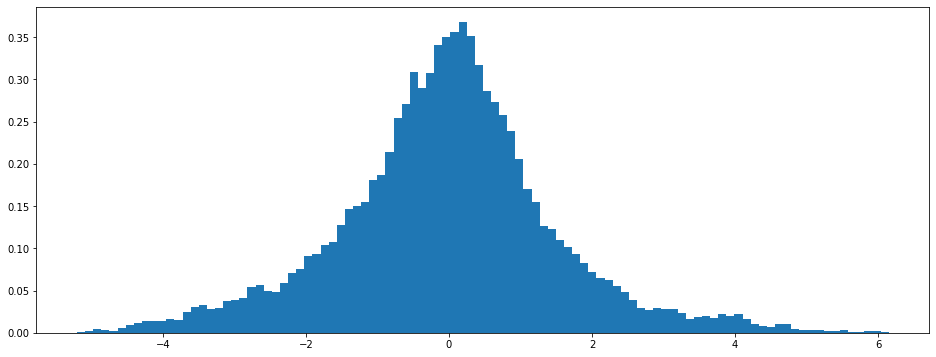

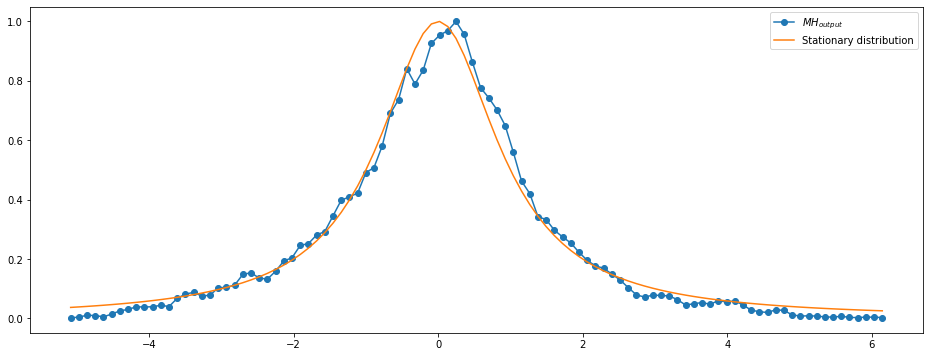

In [162]:
N = 100000
b = 0.1
plot_outputs_cauchy(N=N, b=b)

### Função estacionária: Cauchy, 𝑏=1

Selected points percentage:  0.86205


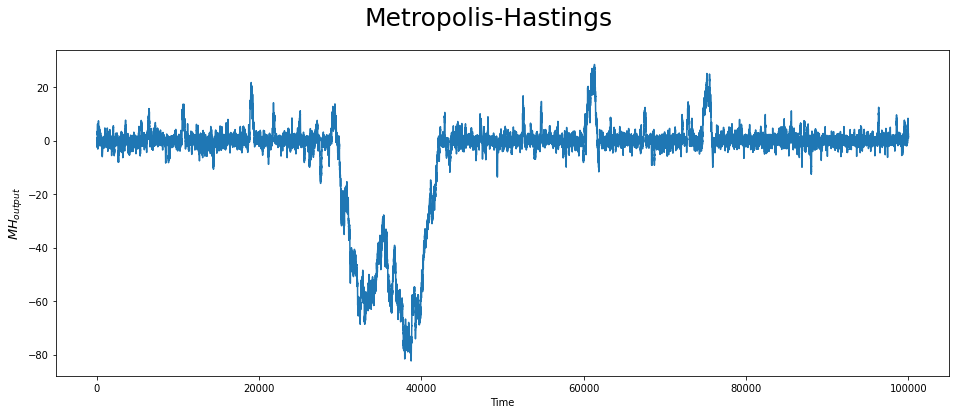

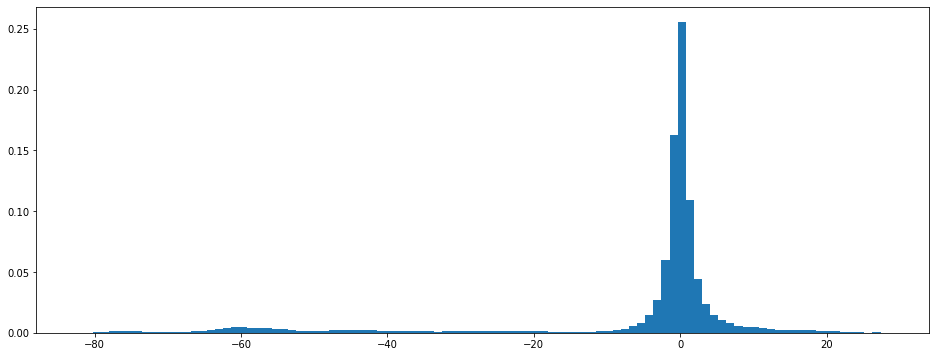

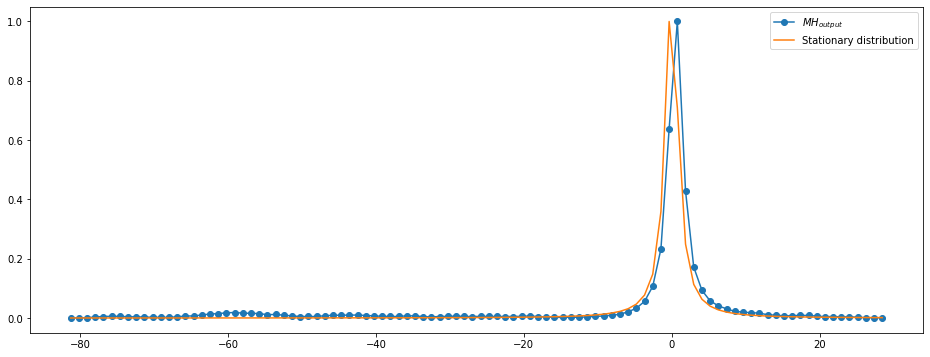

In [163]:
N = 100000
b = 1
plot_outputs_cauchy(N=N, b=b)

### Função estacionária: Cauchy, 𝑏=100

Selected points percentage:  0.06084


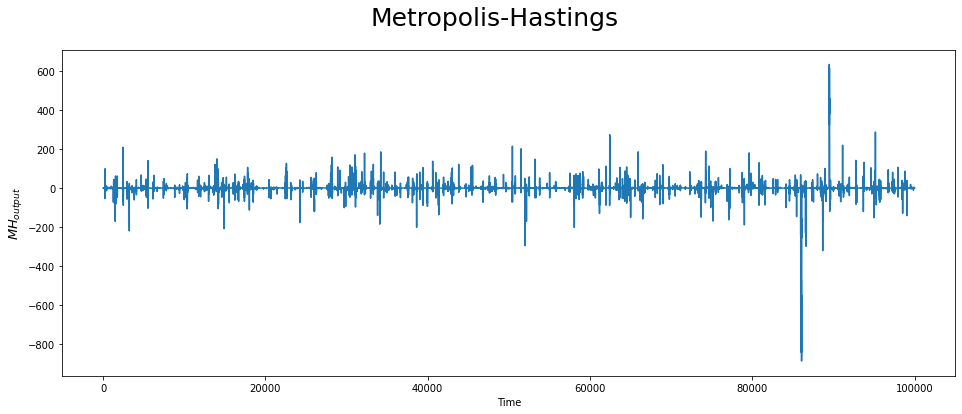

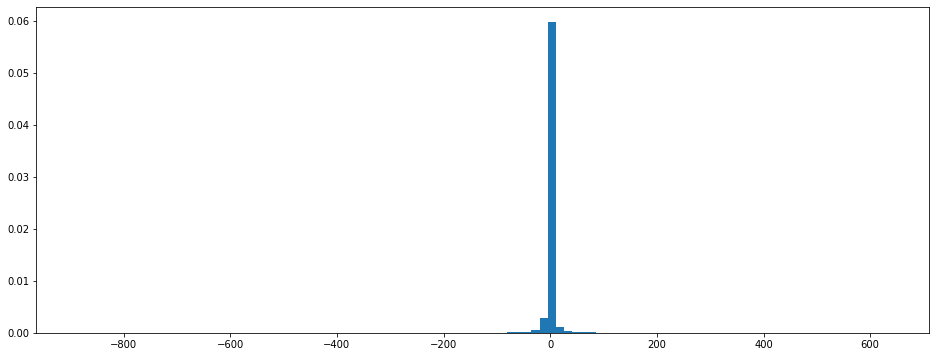

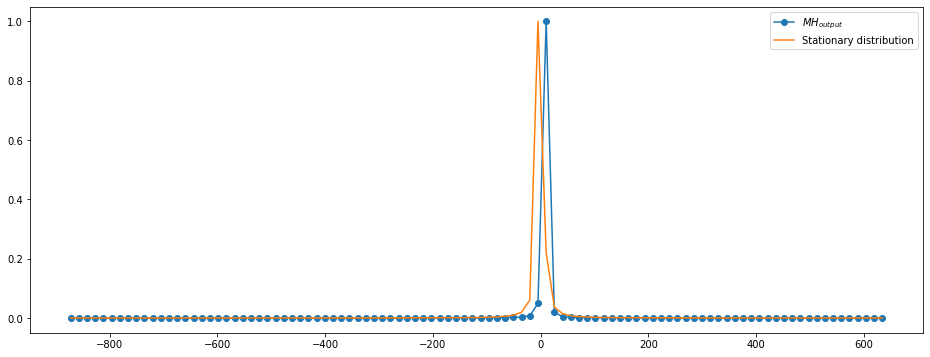

In [164]:
N = 100000
b = 100
plot_outputs_cauchy(N=N, b=b)